In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.datasets import load_wine
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Layer
from tensorflow.keras import Model
from tensorflow.keras.activations import relu,sigmoid, softmax, tanh
from tensorflow.keras.initializers import glorot_normal
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

from sklearn.metrics import confusion_matrix,classification_report, plot_confusion_matrix
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.utils import to_categorical

from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
print('Dataset size : ')
print('x_train ', x_train.shape)
print('x_test ', x_test.shape)
print('y_train ', y_train.shape)
print('y_test ', y_test.shape)

Dataset size : 
x_train  (60000, 28, 28)
x_test  (10000, 28, 28)
y_train  (60000,)
y_test  (10000,)


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
len(class_names)

10

# Show a random set of FIVE (5) images from each class in the dataset with their corresponding class names.

In [6]:
x_train = x_train.reshape(60000, 28, 28, 1)

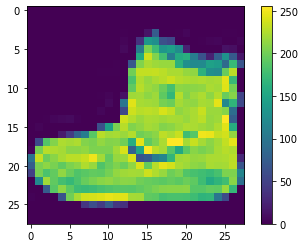

In [7]:
plt.figure()
plt.imshow((tf.squeeze(x_train[0])))
plt.colorbar()
plt.grid(False)
plt.show()

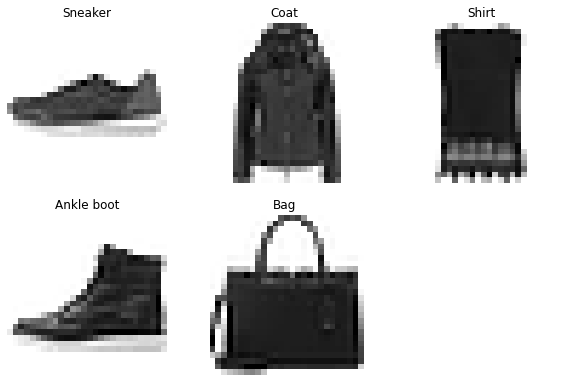

In [8]:
import random
plt.figure(figsize=(10,10))
for i in range(5):
    ax = plt.subplot(3,3,i + 1)
    rand_index = random.choice(range(len(x_train)))
    plt.imshow(tf.squeeze(x_train[rand_index]), cmap=plt.cm.binary)
    plt.title(class_names[y_train[rand_index]])
    plt.axis('off')

#  Normalizing the pixel values to be between 0 and 1

In [9]:
# normalize inputs from 0-255 to 0.0-1.0
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
#Reshaping images to 28px by 28px and 1 channel
x_train = x_train.reshape(x_train.shape[0],28,28,1) #channel dimension is created to be used for Conv2D
x_test = x_test.reshape(x_test.shape[0],28,28,1)

print('Reshaped image ', x_train[0].shape)

Reshaped image  (28, 28, 1)


In [12]:
#One-Hot-Encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print('One hot encoded label ', y_train[0])

One hot encoded label  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Keep 15% of the train dataset for validation

In [13]:
15/100 * 60000

9000.0

In [14]:
split = StratifiedShuffleSplit(n_splits=1, test_size=9000)
for train_index, test_index in split.split(x_train, y_train):
    X_train, X_val = x_train[train_index], x_train[test_index]
    y_train, y_val = y_train[train_index], y_train[test_index]

In [15]:
X_train.shape

(51000, 28, 28, 1)

In [16]:
X_val.shape

(9000, 28, 28, 1)

In [17]:
# function to plot the learning curves
def plot_results(history):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))

    ax1.plot(history['loss'], label="Train loss")
    ax1.plot(history['val_loss'], label="Validation loss")
    ax2.plot(history['accuracy'], label="Train accuracy")
    ax2.plot(history['val_accuracy'], label="Validation accuracy")

    ax1.legend(fontsize=15);
    ax2.legend(fontsize=15);

    ax1.set_title('Loss per epoch', fontsize=25);
    ax1.set_xlabel("epoch", fontsize=20);
    ax2.set_title('Accuracy per epoch', fontsize=25);
    ax2.set_xlabel("epoch", fontsize=20);

    ax1.grid(True)
    ax2.grid(True)

In [18]:
#Building CNN 
model = Sequential()
#First Layer
model.add(Conv2D(64, 3, activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

#Second Layer
model.add(Conv2D(32, 3, activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

#Flatten and Output Dense Layer
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 32)          0

In [19]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

In [20]:
checkpoint = ModelCheckpoint('CNN_model{epoch:02d}.h5') 
epochs = 50 #number of rounds of training over the entire training dataset
CNN_model = model.fit(X_train, y_train, epochs=epochs, batch_size=128, validation_data=(X_val, y_val), callbacks =[checkpoint])

Epoch 1/50
399/399 [==============================] - 23s 55ms/step - loss: 0.6300 - accuracy: 0.7653 - val_loss: 0.4033 - val_accuracy: 0.8498
Epoch 2/50
399/399 [==============================] - 22s 55ms/step - loss: 0.4008 - accuracy: 0.8510 - val_loss: 0.3458 - val_accuracy: 0.8794
Epoch 3/50
399/399 [==============================] - 22s 55ms/step - loss: 0.3455 - accuracy: 0.8704 - val_loss: 0.2978 - val_accuracy: 0.8950
Epoch 4/50
399/399 [==============================] - 22s 55ms/step - loss: 0.3161 - accuracy: 0.8823 - val_loss: 0.2980 - val_accuracy: 0.8907
Epoch 5/50
399/399 [==============================] - 22s 55ms/step - loss: 0.2959 - accuracy: 0.8892 - val_loss: 0.2666 - val_accuracy: 0.9036
Epoch 6/50
399/399 [==============================] - 22s 54ms/step - loss: 0.2777 - accuracy: 0.8949 - val_loss: 0.2452 - val_accuracy: 0.9111
Epoch 7/50
399/399 [==============================] - 22s 54ms/step - loss: 0.2661 - accuracy: 0.8997 - val_loss: 0.2558 - val_accuracy:

# Rate the performance of the algorithm and provide necessary plots

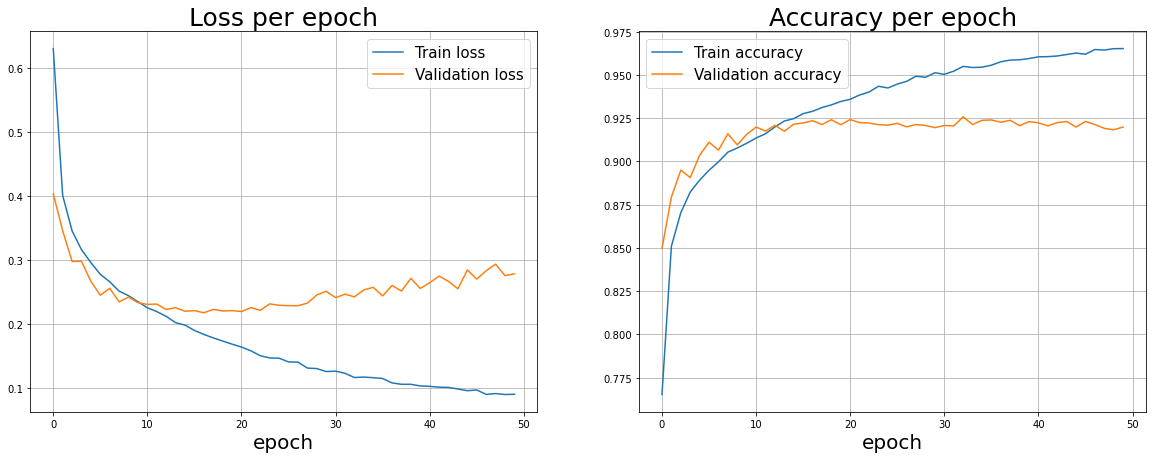

In [21]:
# plotting the learning curves
plot_results(CNN_model.history)

In [22]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print("Accuracy: %.2f%%" % (score[1]*100)) #2nd values 
print("Loss: %.4f" % (score[0])) #1st value in scores

Accuracy: 91.70%
Loss: 0.2970


In [23]:
y_pred=model.predict(x_test) 
y_pred=np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 4ms/step


In [24]:
y_test_arg=np.argmax(y_test,axis=1)

In [25]:
print(classification_report(y_test_arg, y_pred, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.88      0.87      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.88      0.87      0.87      1000
       Dress       0.91      0.94      0.92      1000
        Coat       0.88      0.84      0.86      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.75      0.77      0.76      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [27]:
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, y_pred)
print(cm)

Confusion Matrix
[[876   0  17  11   1   0  88   0   7   0]
 [  2 978   0  11   4   0   3   0   2   0]
 [ 20   0 871   8  43   0  58   0   0   0]
 [ 13   2   5 935  20   0  24   0   1   0]
 [  1   0  46  30 837   0  82   0   4   0]
 [  1   0   0   0   0 976   0  17   0   6]
 [ 98   1  51  26  41   0 773   0  10   0]
 [  0   0   0   0   0   3   0 967   0  30]
 [  1   1   1   5   2   1   3   2 984   0]
 [  1   0   0   0   0   4   1  21   0 973]]


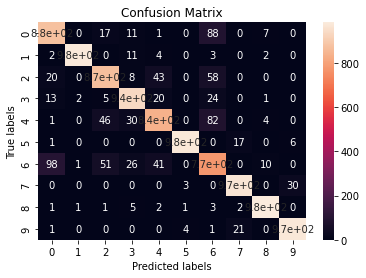

In [28]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

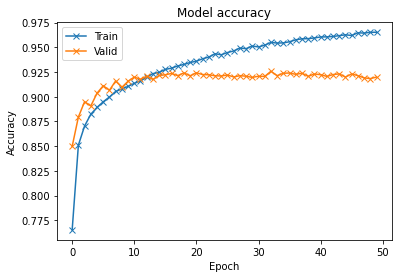

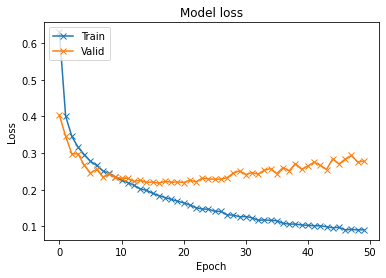

In [29]:
# Plot training & validation accuracy values
plt.plot(CNN_model.history['accuracy'],'x-')
plt.plot(CNN_model.history['val_accuracy'],'x-')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(CNN_model.history['loss'],'x-')
plt.plot(CNN_model.history['val_loss'],'x-')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

In [31]:
y_predict = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 1s 4ms/step


# Pick a random image from the test dataset, pass it to the algorithm

In [42]:
id = 1 #extracts the 1st image
test = x_test[id: id+1,:] # extracts the id'th test image
prob = model.predict(test)
print(prob[0])

1/1 [==============================] - 0s 14ms/step
[2.2030805e-10 6.3537039e-21 1.0000000e+00 2.7570694e-14 4.7488250e-12
 6.2013203e-19 2.1458091e-09 7.3643551e-21 2.1529831e-13 2.7316163e-24]


In [43]:
max(prob[0]) #maximum probability

1.0

In [46]:
print(np.argmax(prob[0]))  #predicted label number, is the index that has the maximum value

2


## 2 is the predicted index

In [35]:
y_test[id]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [45]:
print(y_test[id: id+1,:])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


## Model correctly predict the random image